In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [63]:
# Load the dataset (replace 'your_file.csv' with actual file path)
df = pd.read_csv("EV Maker by Place.csv")


# Data Preprocessing

In [34]:

# Step 1: Check for Missing Values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 EV Maker    0
Place       0
State       0
dtype: int64


In [35]:

# Step 2: Remove Duplicates
df.drop_duplicates(inplace=True)


In [36]:

# Step 3: Standardize Column Names (remove spaces & lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [37]:

# Step 4: Fix Text Formatting (strip spaces, convert to lowercase)
for col in ["ev_maker", "place", "state"]:
    df[col] = df[col].astype(str).str.strip().str.lower()



In [38]:
# Step 5: Verify Unique Values in Categorical Columns
print("Unique States:\n", df["state"].unique())



Unique States:
 ['maharashtra' 'karnataka' 'delhi' 'tamil nadu' 'gujarat' 'haryana'
 'rajasthan' 'telangana' 'west bengal' 'andhra pradesh' 'madhya pradesh'
 'punjab' 'uttarakhand']
            ev_maker        place        state
0        tata motors         pune  maharashtra
1  mahindra electric    bengaluru    karnataka
2       ather energy    bengaluru    karnataka
3      hero electric    new delhi        delhi
4       ola electric  krishnagiri   tamil nadu


In [39]:

#cleaned dataset
df.to_csv("cleaned_ev_makers.csv", index=False)

# Display the first few rows of the cleaned dataset
print(df.head())

            ev_maker        place        state
0        tata motors         pune  maharashtra
1  mahindra electric    bengaluru    karnataka
2       ather energy    bengaluru    karnataka
3      hero electric    new delhi        delhi
4       ola electric  krishnagiri   tamil nadu


In [40]:

# Load the cleaned dataset
df = pd.read_csv("cleaned_ev_makers.csv")

# Step 1: Basic Info
print("Dataset Overview:\n")
print(df.info())  # Check data types and null values
print("\nSummary Statistics:\n")
print(df.describe())  # Check summary statistics (if applicable)

# Step 2: Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ev_maker  61 non-null     object
 1   place     61 non-null     object
 2   state     61 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None

Summary Statistics:

           ev_maker place        state
count            61    61           61
unique           61    36           13
top     tata motors  pune  maharashtra
freq              1     7           15

Missing Values:
 ev_maker    0
place       0
state       0
dtype: int64


In [41]:

# Step 3: Most Common EV Manufacturers
top_ev_makers = df["ev_maker"].value_counts().head(10)  # Top 10 EV makers
print("\nTop 10 EV Manufacturers:\n", top_ev_makers)


Top 10 EV Manufacturers:
 tata motors         1
jsw energy          1
force motors        1
tvs electronics     1
royal enfield       1
bharat forge        1
hindustan motors    1
atul auto           1
sml isuzu           1
mahindra reva       1
Name: ev_maker, dtype: int64


In [42]:

# Step 4: States with Most EV Makers
top_states = df["state"].value_counts().head(10)  # Top 10 states by EV makers
print("\nTop 10 States with Most EV Manufacturers:\n", top_states)


Top 10 States with Most EV Manufacturers:
 maharashtra       15
tamil nadu        11
karnataka          6
haryana            6
gujarat            5
delhi              4
rajasthan          4
telangana          3
west bengal        3
andhra pradesh     1
Name: state, dtype: int64


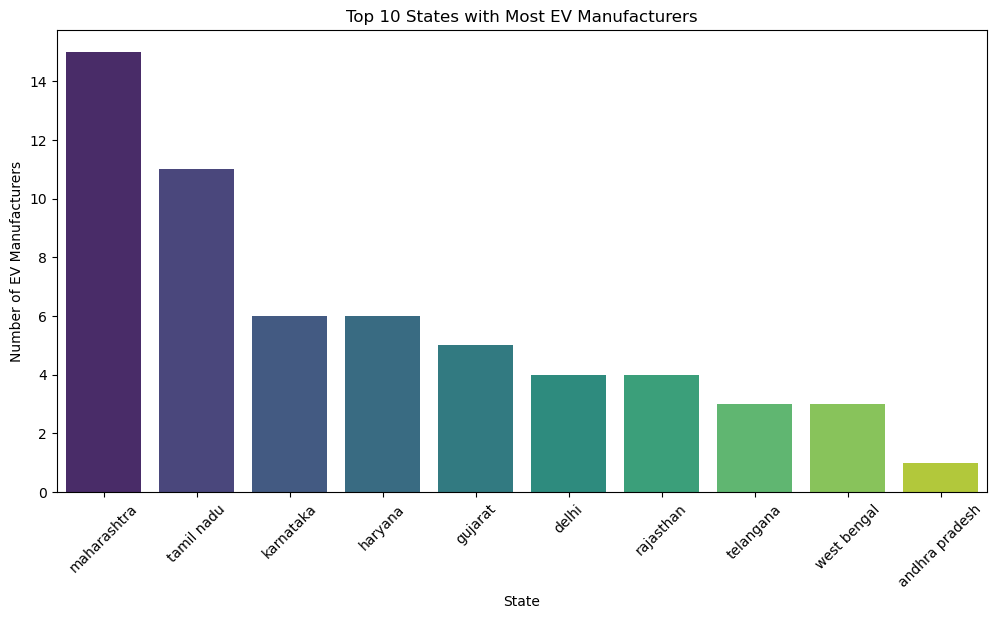

In [43]:

# Step 5: Visualization - EV Manufacturers by State
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of EV Manufacturers")
plt.title("Top 10 States with Most EV Manufacturers")
plt.show()

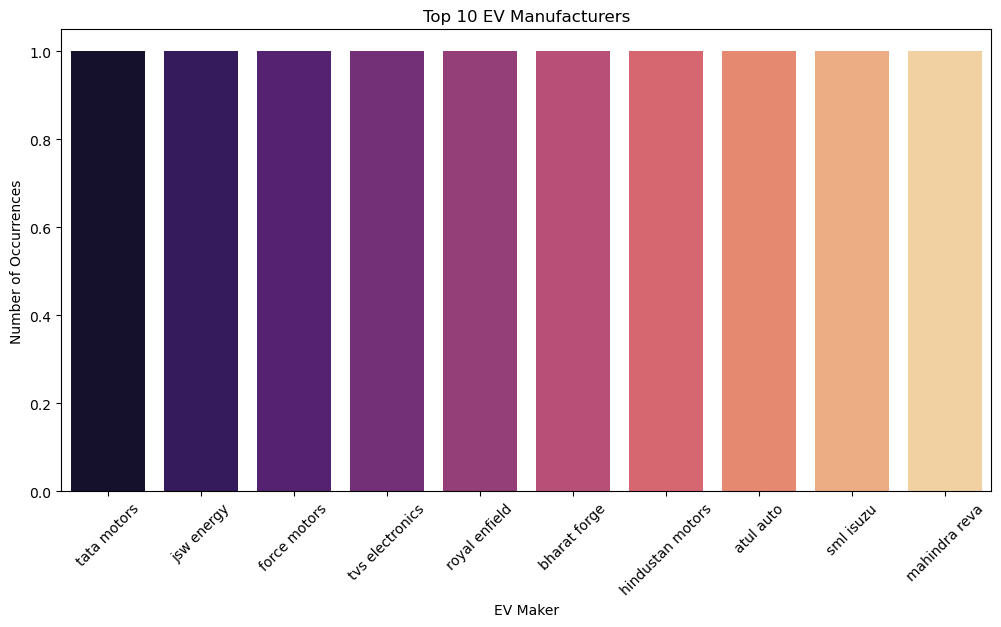

In [44]:

# Visualization - Most Common EV Makers
plt.figure(figsize=(12,6))
sns.barplot(x=top_ev_makers.index, y=top_ev_makers.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("EV Maker")
plt.ylabel("Number of Occurrences")
plt.title("Top 10 EV Manufacturers")
plt.show()

## Geographic Segmentation - EV Manufacturers by State**


In [46]:

state_counts = df["state"].value_counts()
print("Number of EV Manufacturers by State:\n", state_counts)

Number of EV Manufacturers by State:
 maharashtra       15
tamil nadu        11
karnataka          6
haryana            6
gujarat            5
delhi              4
rajasthan          4
telangana          3
west bengal        3
andhra pradesh     1
madhya pradesh     1
punjab             1
uttarakhand        1
Name: state, dtype: int64


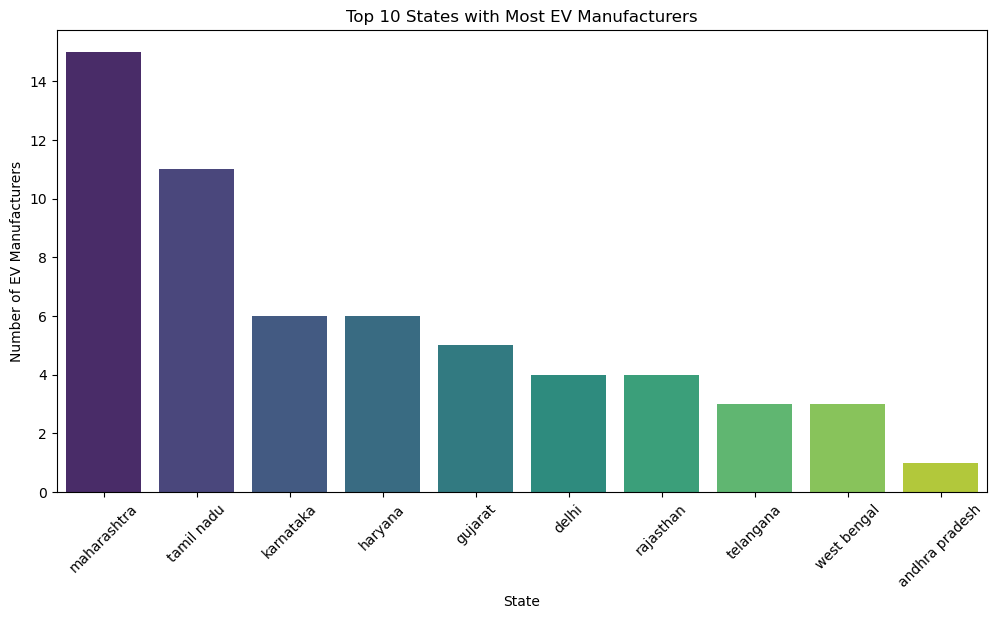

In [47]:
# Plot EV manufacturers by state
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of EV Manufacturers")
plt.title("Top 10 States with Most EV Manufacturers")
plt.show()


## Business Segmentation - Major vs Emerging EV Makers**


In [48]:
# Define major EV makers (top 10 most common)
major_ev_makers = df["ev_maker"].value_counts().head(10).index.tolist()

In [49]:
# Create a new column classifying EV makers
df["manufacturer_type"] = df["ev_maker"].apply(lambda x: "Major" if x in major_ev_makers else "Emerging")

print("\nEV Manufacturers Segmentation (Major vs Emerging):\n", df["manufacturer_type"].value_counts())



EV Manufacturers Segmentation (Major vs Emerging):
 Emerging    51
Major       10
Name: manufacturer_type, dtype: int64


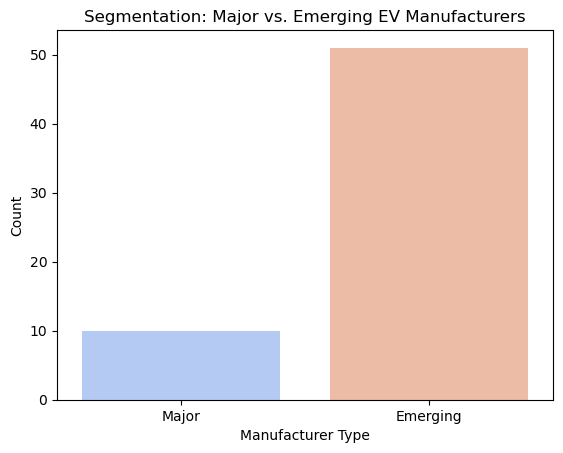

In [50]:
# Plot segmentation
sns.countplot(x=df["manufacturer_type"], palette="coolwarm")
plt.title("Segmentation: Major vs. Emerging EV Manufacturers")
plt.xlabel("Manufacturer Type")
plt.ylabel("Count")
plt.show()


## 3 Clustering Analysis - K-Means for Data-Driven Segmentation


In [51]:
# Encode categorical variables (State & Place) for clustering
label_encoder = LabelEncoder()
df["state_encoded"] = label_encoder.fit_transform(df["state"])
df["place_encoded"] = label_encoder.fit_transform(df["place"])

In [52]:
# Select features for clustering
X = df[["state_encoded", "place_encoded"]]

In [53]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

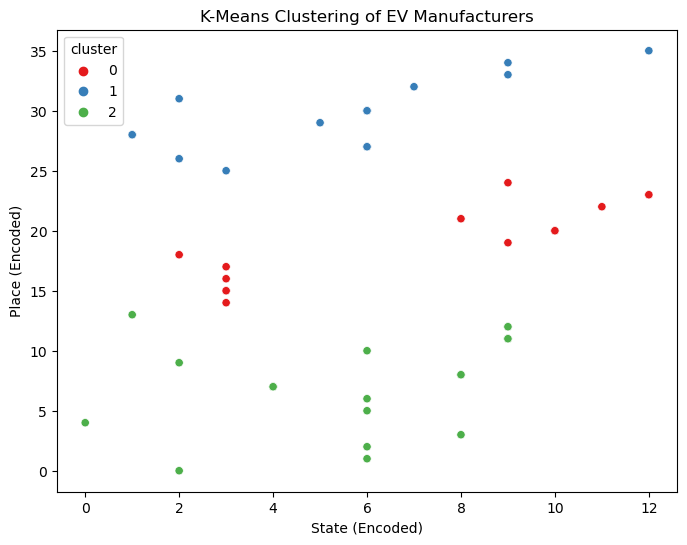

In [54]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["state_encoded"], y=df["place_encoded"], hue=df["cluster"], palette="Set1")
plt.title("K-Means Clustering of EV Manufacturers")
plt.xlabel("State (Encoded)")
plt.ylabel("Place (Encoded)")
plt.show()


In [56]:
# Save the segmented dataset
df.to_csv("segmented_ev_makers.csv", index=False)

### EV Manufacturers by State (Heatmap)**


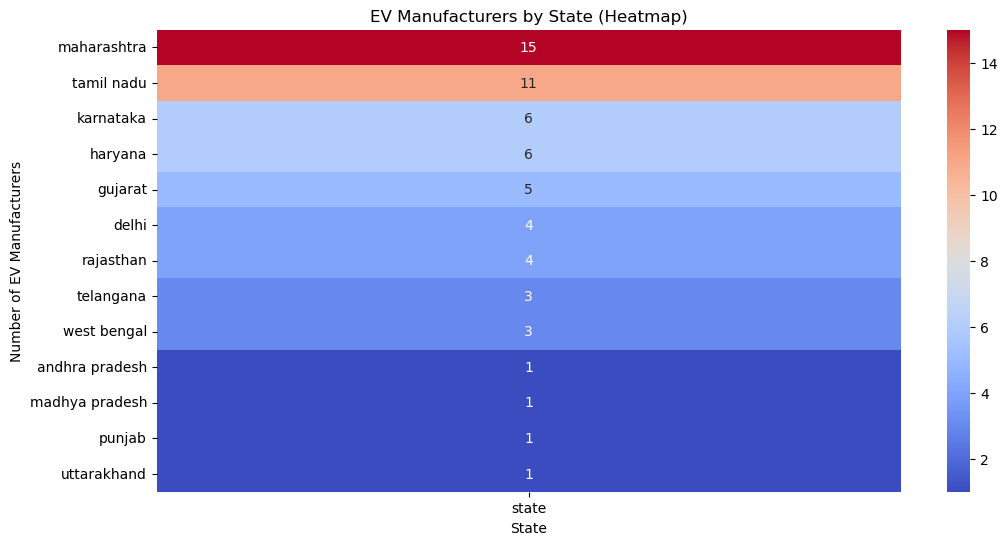

In [57]:
plt.figure(figsize=(12,6))
state_counts = df["state"].value_counts()
sns.heatmap(state_counts.to_frame(), cmap="coolwarm", annot=True, fmt="d")
plt.title("EV Manufacturers by State (Heatmap)")
plt.xlabel("State")
plt.ylabel("Number of EV Manufacturers")
plt.show()


### Distribution of EV Makers (Pie Chart)**

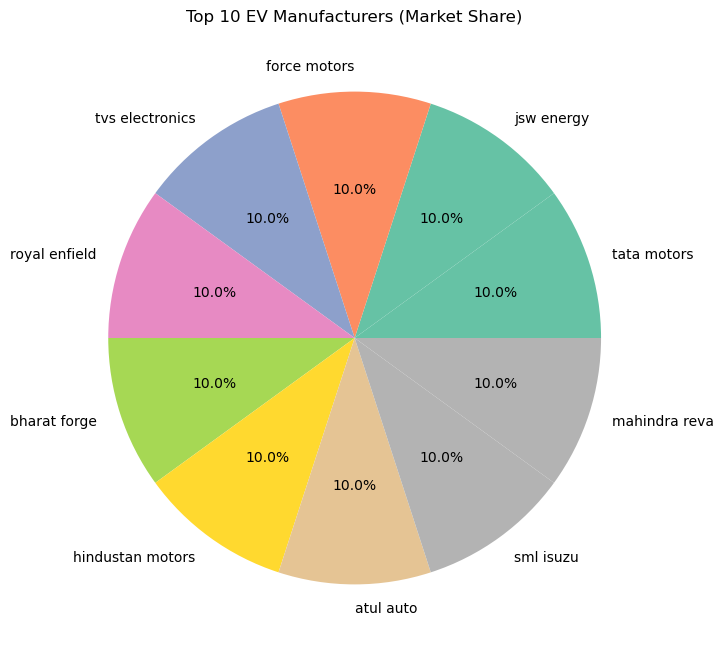

In [58]:
plt.figure(figsize=(8,8))
df["ev_maker"].value_counts().head(10).plot.pie(autopct="%1.1f%%", cmap="Set2")
plt.title("Top 10 EV Manufacturers (Market Share)")
plt.ylabel("")  # Hide y-label
plt.show()